📝Prediciendo la diabetes
Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.

Import libreries 
LINA: https://github.com/linama2593/machine-learning-banking-data/blob/main/src/ML_banking_data.ipynb

CODESHARE: https://codeshare.io/eVDXvb

Queremos verificar si existe una relación significativa entre las variables Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age y la variable de clase Outcome en el conjunto de datos. Se hipotetiza que ciertos valores o combinaciones de valores en estas variables pueden estar asociados con un mayor riesgo de padecer diabetes, y que, por lo tanto, estas variables podrían utilizarse para desarrollar un modelo predictivo de la probabilidad de diabetes en un individuo.

Se espera que, al analizar estadísticamente estas variables en relación con la variable de clase Outcome, se encuentren patrones o tendencias que permitan inferir la probabilidad de desarrollar diabetes. Además, se plantea la hipótesis de que ciertos factores, como el nivel de glucosa, el índice de masa corporal (BMI) y la edad, tendrán una influencia significativa en la predicción de la diabetes.

Para probar esta hipótesis, se realizarán análisis estadísticos, como regresiones y pruebas de significancia, para evaluar la fuerza y la dirección de las asociaciones entre las variables independientes (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age) y la variable dependiente (Outcome). Si se confirma la relación significativa, se podría desarrollar un modelo predictivo que utilice estas variables para estimar la probabilidad de padecer diabetes en una población.

Importación de librerias

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pickle import dump, load
from sklearn.feature_selection import chi2 , SelectKBest, mutual_info_regression
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score, make_scorer, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics

Data Ingestion

In [56]:
link = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
total_data = pd.read_csv(link)
total_data.to_csv('diabetes.csv', index=False)


Data variables dictionary:

Pregnancies. Número de embarazos del paciente (numérico)

Glucose. Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)

BloodPressure. Presión arterial diastólica (medida en mm Hg) (numérico)

SkinThickness. Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)

Insulin. Insulina sérica de 2 horas (medida en mu U/ml) (numérico)

BMI. Índice de masa corporal (numérico)

DiabetesPedigreeFunction. Función de pedigrí de diabetes (numérico)

Age. Edad del paciente (numérico)

Outcome. Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico)

Data exploration & descriptive analysis

In [57]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [58]:
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Check duplicates

In [5]:
print(total_data.duplicated().sum())

0


No duplicates found

In [7]:
#Reset index
total_data.reset_index(drop=True, inplace=True)

🚀 Análisis descriptivo de datos

In [8]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



These results show descriptive statistics for each column in the dataset, which appears to be related to diabetes. Here's an interpretation of the results:

✅Pregnancies:

Mean: 3.85
Standard Deviation: 3.37
Minimum: 0
25th Percentile: 1
Median: 3
75th Percentile: 6
Maximum: 17

✅Glucose:

Mean: 120.89
Standard Deviation: 31.97
Minimum: 0
25th Percentile: 99
Median: 117
75th Percentile: 140.25
Maximum: 199

✅BloodPressure:

Mean: 69.11
Standard Deviation: 19.36
Minimum: 0
25th Percentile: 62
Median: 72
75th Percentile: 80
Maximum: 122

✅SkinThickness:

Mean: 20.54
Standard Deviation: 15.95
Minimum: 0
25th Percentile: 0
Median: 23
75th Percentile: 32
Maximum: 99

✅Insulin:

Mean: 79.80
Standard Deviation: 115.24
Minimum: 0
25th Percentile: 0
Median: 30.5
75th Percentile: 127.25
Maximum: 846

✅BMI (Body Mass Index):

Mean: 31.99
Standard Deviation: 7.88
Minimum: 0
25th Percentile: 27.3
Median: 32
75th Percentile: 36.6
Maximum: 67.1

✅DiabetesPedigreeFunction:

Mean: 0.47
Standard Deviation: 0.33
Minimum: 0.078
25th Percentile: 0.24375
Median: 0.3725
75th Percentile: 0.62625
Maximum: 2.42

✅Age:

Mean: 33.24
Standard Deviation: 11.76
Minimum: 21
25th Percentile: 24
Median: 29
75th Percentile: 41
Maximum: 81

✅Outcome:

Mean: 0.35
Standard Deviation: 0.48
Minimum: 0
25th Percentile: 0
Median: 0
75th Percentile: 1
Maximum: 1

🚀 EDA

In [ ]:
EXPLORING VARIABLES

In [59]:
#Verifi null values
total_data.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no null values

👉 Análisis univariante

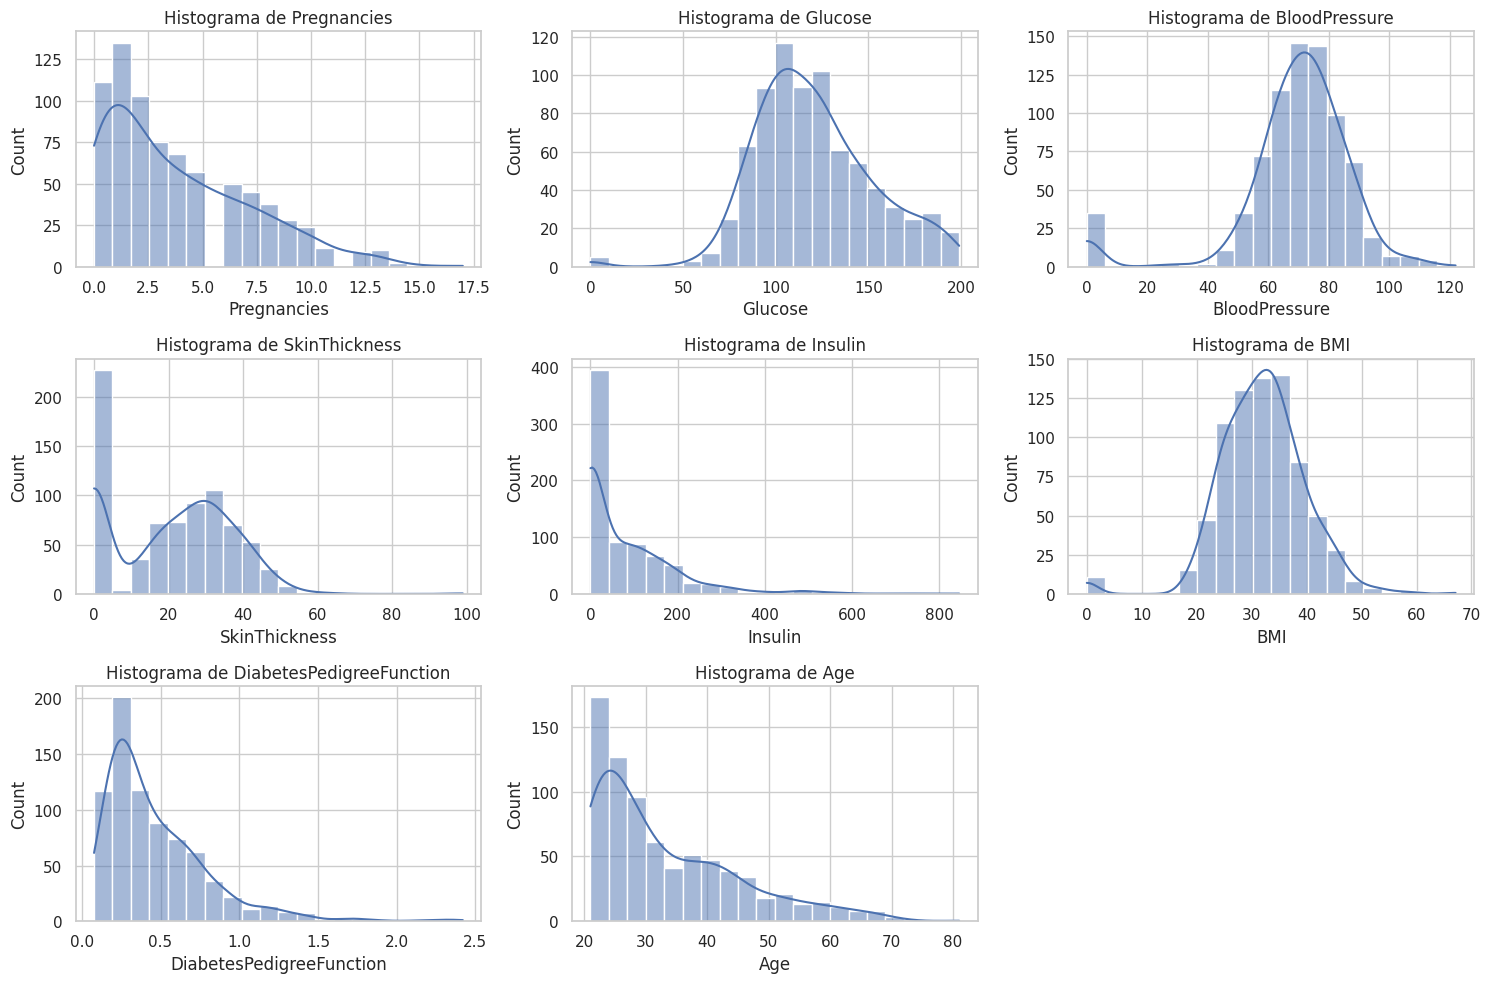

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer el estilo de Seaborn para hacer los gráficos más atractivos
sns.set(style="whitegrid")

# Variables numéricas
numeric_variables = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Crear subgráficos de histogramas
plt.figure(figsize=(15, 10))
for i, variable in enumerate(numeric_variables, 1):
    plt.subplot(3, 3, i)
    sns.histplot(total_data[variable], bins=20, kde=True)
    plt.title(f'Histograma de {variable}')

plt.tight_layout()
plt.show()


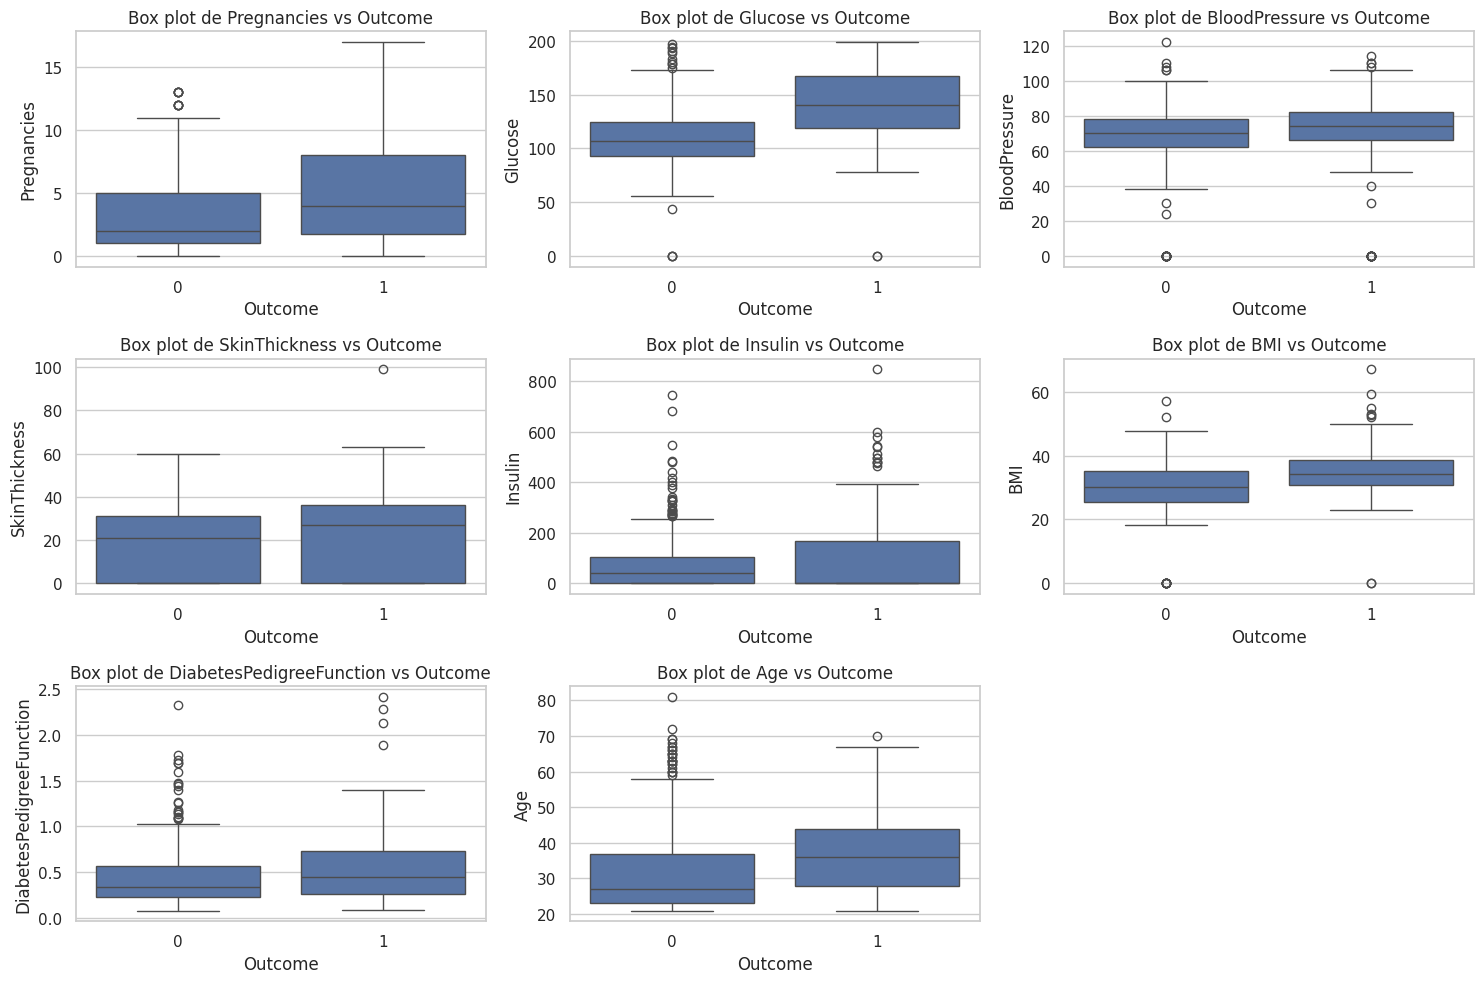

In [12]:
# box plots
plt.figure(figsize=(15, 10))
for i, variable in enumerate(numeric_variables, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x="Outcome", y=variable, data=total_data)
    plt.title(f'Box plot de {variable} vs Outcome')

plt.tight_layout()
plt.show()


👉 Analísis multivariante 

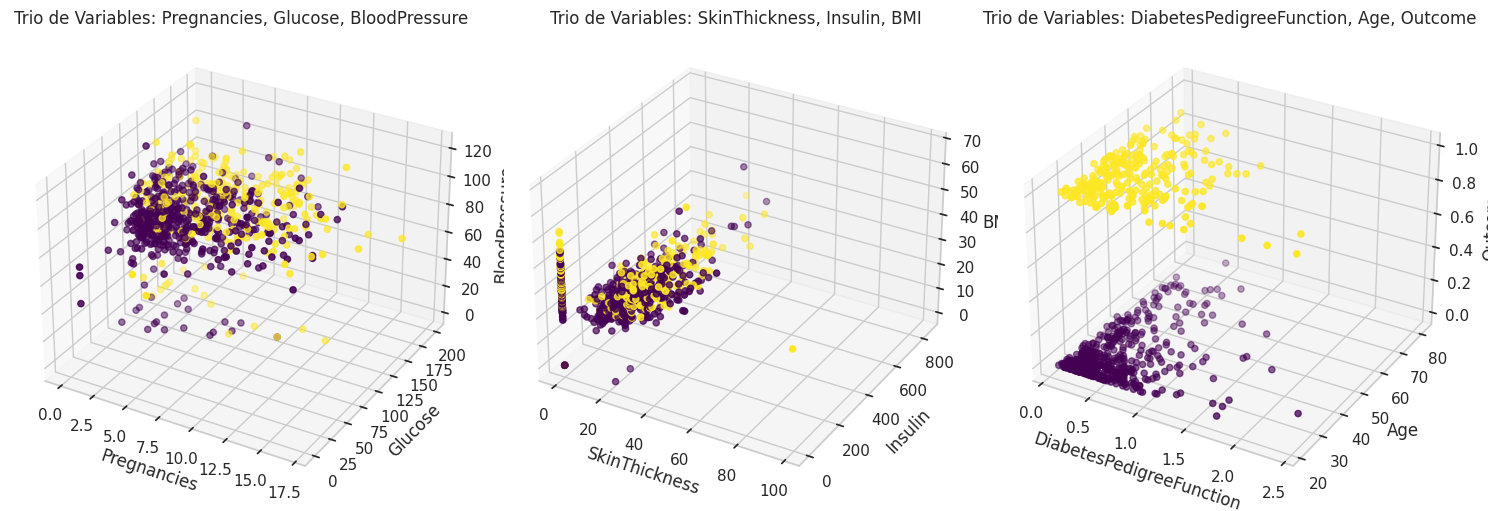

In [13]:
# Crear subgráficos 3D
from mpl_toolkits.mplot3d import Axes3D

# Seleccionar tríos de variables
trios_variables = [
    ["Pregnancies", "Glucose", "BloodPressure"],
    ["SkinThickness", "Insulin", "BMI"],
    ["DiabetesPedigreeFunction", "Age", "Outcome"]
]

# Crear subgráficos 3D
fig = plt.figure(figsize=(15, 5))

for i, trio in enumerate(trios_variables, start=1):
    ax = fig.add_subplot(1, 3, i, projection='3d')
    ax.scatter(total_data[trio[0]], total_data[trio[1]], total_data[trio[2]], c=total_data["Outcome"], cmap='viridis')
    ax.set_xlabel(trio[0])
    ax.set_ylabel(trio[1])
    ax.set_zlabel(trio[2])
    ax.set_title(f'Trio de Variables: {trio[0]}, {trio[1]}, {trio[2]}')

plt.tight_layout()
plt.show()

👉 Comparación por trios 🧛‍♂️🧚‍♀️🧙‍♂️

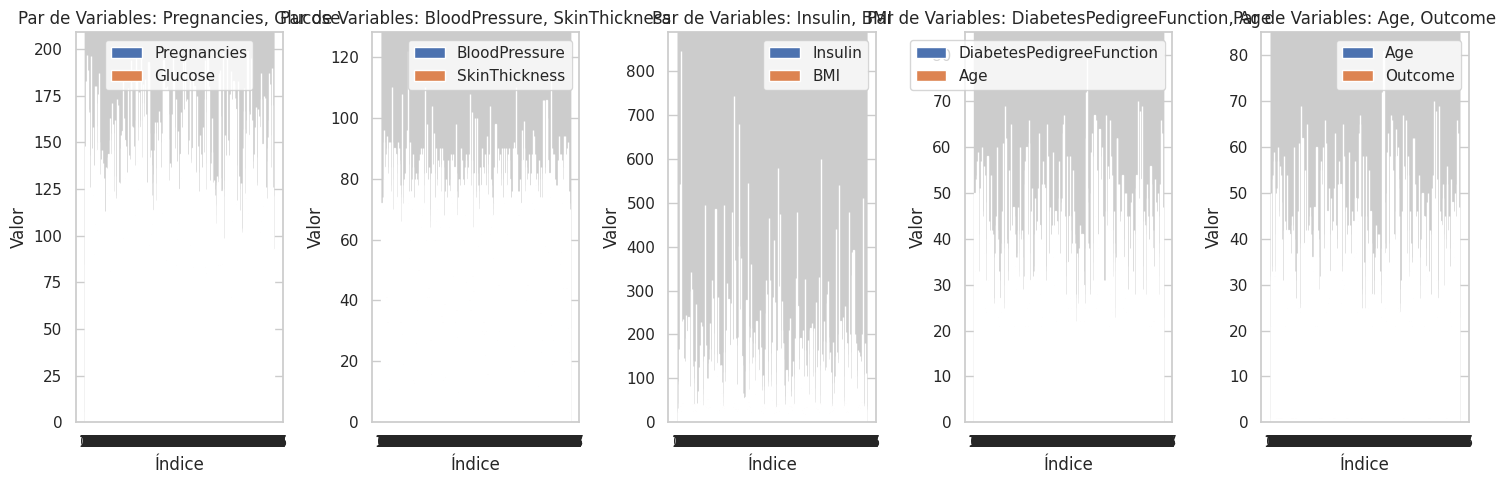

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Seleccionar pares de variables
pares_variables = [
    ["Pregnancies", "Glucose"],
    ["BloodPressure", "SkinThickness"],
    ["Insulin", "BMI"],
    ["DiabetesPedigreeFunction", "Age"],
    ["Age", "Outcome"]
]

# Crear subgráficos de barras agrupadas
fig, axes = plt.subplots(nrows=1, ncols=len(pares_variables), figsize=(15, 5))

for i, par in enumerate(pares_variables):
    # Configurar posiciones de las barras
    positions = np.arange(len(total_data))

    # Configurar el ancho de las barras
    width = 0.4

    # Crear barras agrupadas
    for j, variable in enumerate(par):
        axes[i].bar(positions + j * width, total_data[variable], width, label=variable)

    # Configurar etiquetas y leyenda
    axes[i].set_xticks(positions + width / 2)
    axes[i].set_xticklabels(total_data.index)
    axes[i].set_xlabel('Índice')
    axes[i].set_ylabel('Valor')
    axes[i].set_title(f'Par de Variables: {", ".join(par)}')
    axes[i].legend()

plt.tight_layout()
plt.show()


👉 Comparación por pares 👩‍⚕️👨‍⚕️

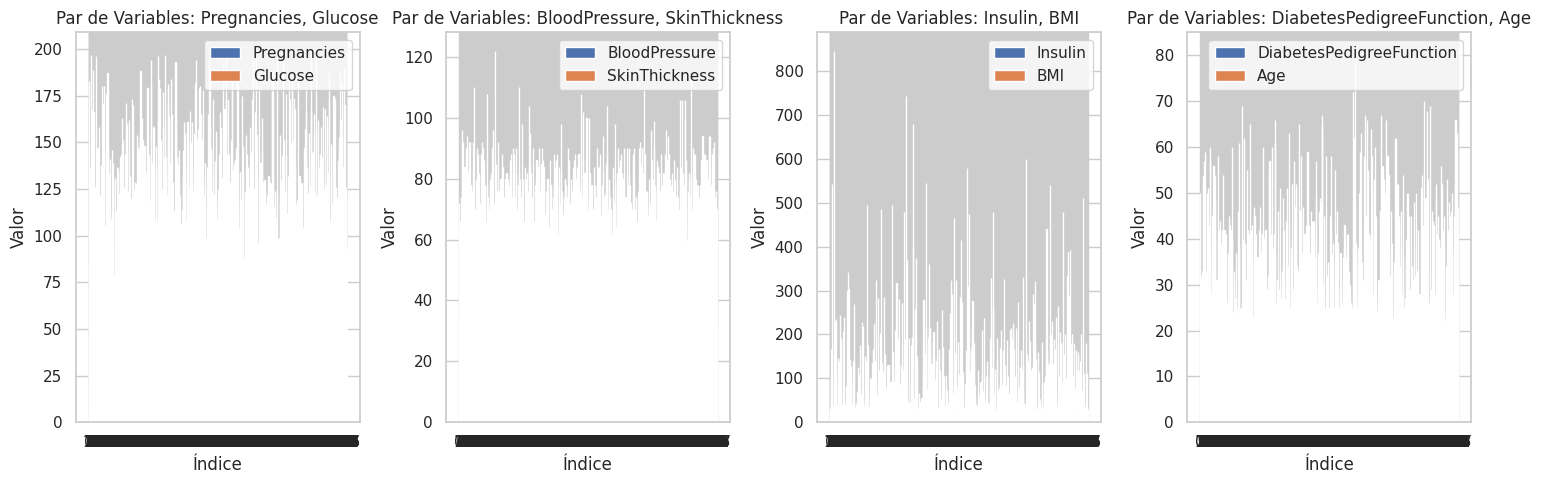

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Seleccionar pares de variables
pares_variables = [
    ["Pregnancies", "Glucose"],
    ["BloodPressure", "SkinThickness"],
    ["Insulin", "BMI"],
    ["DiabetesPedigreeFunction", "Age"]
]

# Crear subgráficos de barras agrupadas
fig, axes = plt.subplots(nrows=1, ncols=len(pares_variables), figsize=(15, 5))

for i, par in enumerate(pares_variables):
    # Configurar posiciones de las barras
    positions = np.arange(len(total_data))

    # Configurar el ancho de las barras
    width = 0.4

    # Crear barras agrupadas
    for j, variable in enumerate(par):
        axes[i].bar(positions + j * width, total_data[variable], width, label=variable)

    # Configurar etiquetas y leyenda
    axes[i].set_xticks(positions + width / 2)
    axes[i].set_xticklabels(total_data.index)
    axes[i].set_xlabel('Índice')
    axes[i].set_ylabel('Valor')
    axes[i].set_title(f'Par de Variables: {", ".join(par)}')
    axes[i].legend()

plt.tight_layout()
plt.show()


Finalizado el EDA, calculamos la Matriz de correlacion de las variables respecto a Outcome

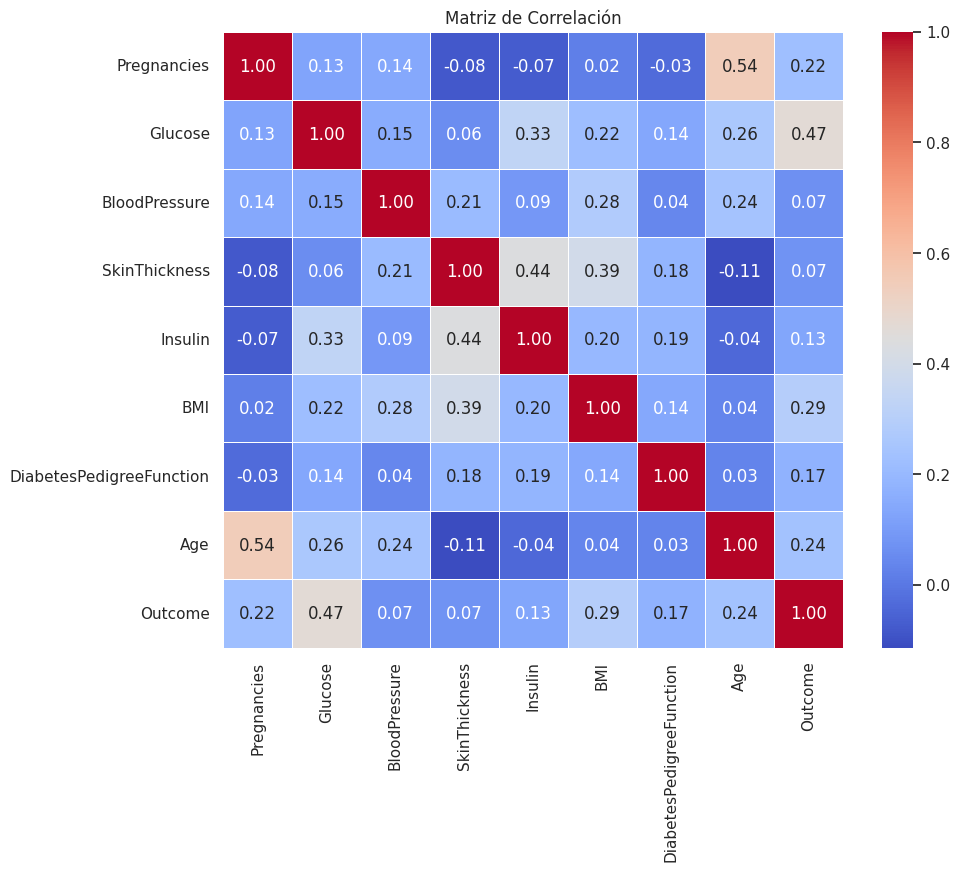

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = total_data.corr()

# Crear un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()



Variables con correlacion significativa respecto a outcome

Las mayores correlaciones entre Outcome y las variables independietes observadas son: 

👉Glucosa: 47 % 
👉BMI: 29% 
👉AGE: 24 % 
👉Pregnancies: 22 % 


Ordenación de valores

/tmp/ipykernel_1767/138646395.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Porcentaje de Correlación', y='Variable', data=df_porcentaje_correlacion, palette='viridis')


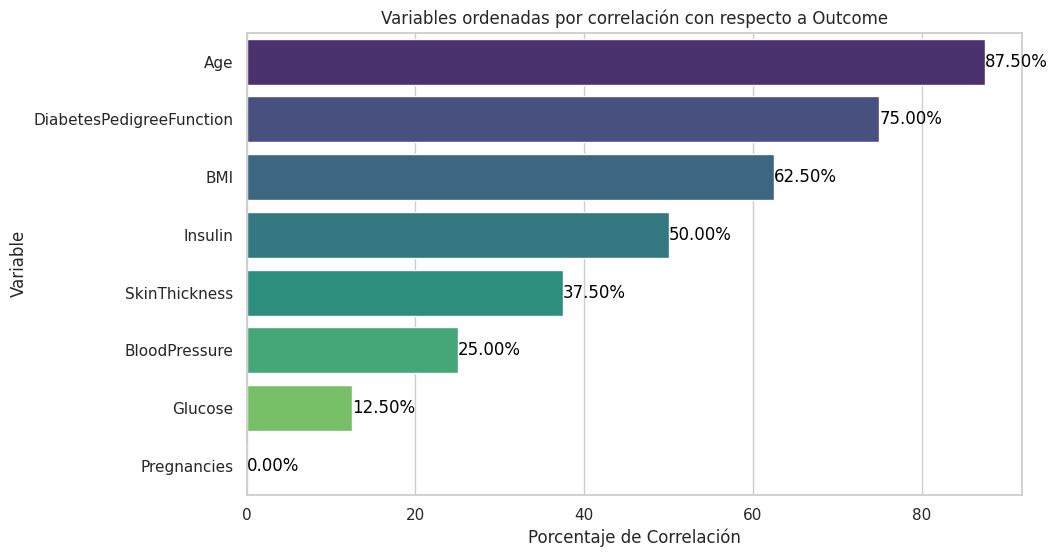

In [53]:
import seaborn as sns

# Crear un DataFrame con las variables ordenadas y sus porcentajes de correlación
df_porcentaje_correlacion = pd.DataFrame(variables_ordenadas_objetivo, columns=['Variable', 'Porcentaje de Correlación'])

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Porcentaje de Correlación', y='Variable', data=df_porcentaje_correlacion, palette='viridis')

# Añadir etiquetas numéricas en las barras
for index, value in enumerate(df_porcentaje_correlacion['Porcentaje de Correlación']):
    barplot.text(value, index, f'{value:.2f}%', color='black', ha="left", va="center")

plt.title('Variables ordenadas por correlación con respecto a Outcome')
plt.xlabel('Porcentaje de Correlación')
plt.ylabel('Variable')
plt.show()


Cálculo numérico de la matriz de correlacion

In [18]:
import pandas as pd

# Crear la matriz de correlación
correlation_matrix = total_data.corr()

# Imprimir la matriz de correlación
print("Matriz de Correlación:\n", correlation_matrix)


Matriz de Correlación:
                           Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose          

👩‍🏫 Pair plot (Todos respecto a outcome)

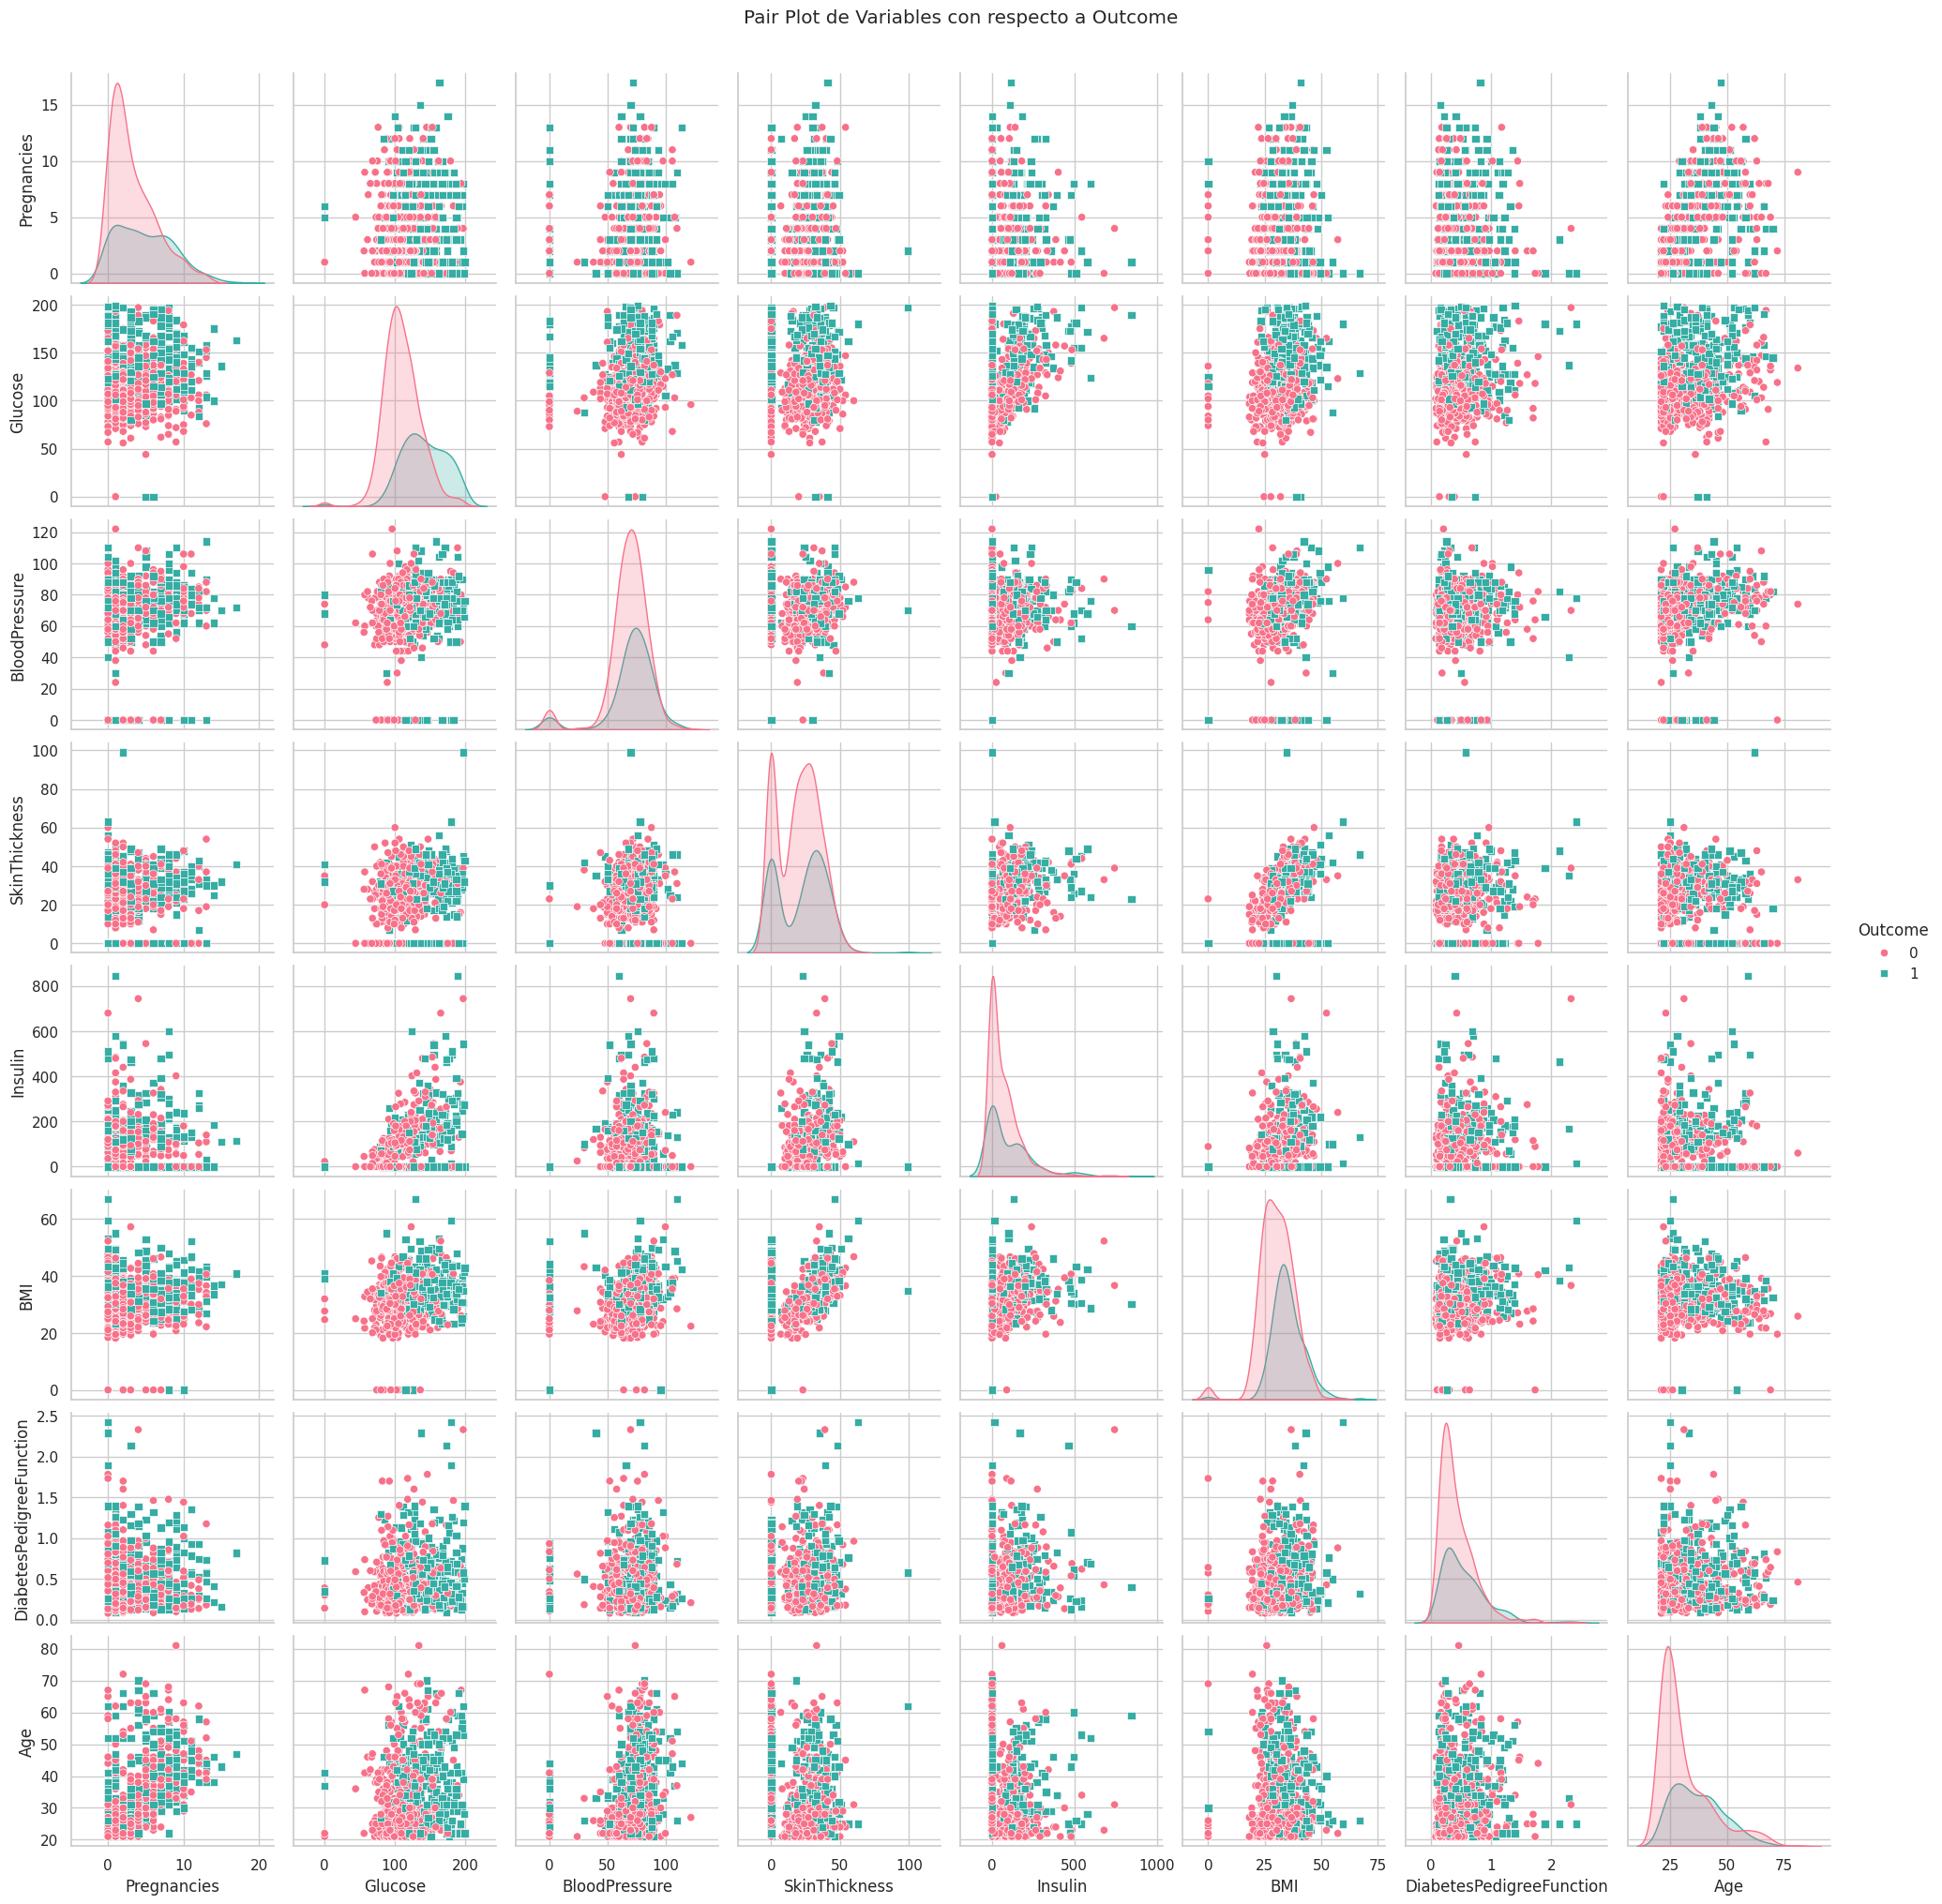

In [22]:
# Seleccionar las variables de interés
variables_interes = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

# Crear un DataFrame solo con las variables seleccionadas
subset_data = total_data[variables_interes]

# Crear un pair plot
sns.pairplot(subset_data, hue="Outcome", markers=["o", "s"], palette="husl")
plt.suptitle("Pair Plot de Variables con respecto a Outcome", y=1.02)
plt.show()


In [ ]:
📊Cálculo de IQR y límites superior e inferior

In [19]:
import pandas as pd

# Crear una copia de seguridad del DataFrame original
total_data_backup = total_data.copy()

# Variables de interés
variables_interes = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

# Calcular límites superior e inferior para la búsqueda de outliers para cada variable
for variable in variables_interes:
    variable_stats = total_data[variable].describe()

    iqr = variable_stats["75%"] - variable_stats["25%"]
    upper_limit = variable_stats["75%"] + 1.5 * iqr
    lower_limit = variable_stats["25%"] - 1.5 * iqr

    # Eliminar outliers y actualizar el DataFrame original
    total_data = total_data[(total_data[variable] >= lower_limit) & (total_data[variable] <= upper_limit)]

    print(f"\nLímites superior e inferior para la búsqueda de outliers de {variable}:")
    print(f"Superior: {round(upper_limit, 2)}, Inferior: {round(lower_limit, 2)}, Rango intercuartílico: {round(iqr, 2)}")

# Mostrar información sobre la eliminación de outliers
print("\nNúmero de filas antes de eliminar outliers:", len(total_data_backup))
print("Número de filas después de eliminar outliers:", len(total_data))



Límites superior e inferior para la búsqueda de outliers de Pregnancies:
Superior: 13.5, Inferior: -6.5, Rango intercuartílico: 5.0

Límites superior e inferior para la búsqueda de outliers de Glucose:
Superior: 201.5, Inferior: 37.5, Rango intercuartílico: 41.0

Límites superior e inferior para la búsqueda de outliers de BloodPressure:
Superior: 107.0, Inferior: 35.0, Rango intercuartílico: 18.0

Límites superior e inferior para la búsqueda de outliers de SkinThickness:
Superior: 82.5, Inferior: -49.5, Rango intercuartílico: 33.0

Límites superior e inferior para la búsqueda de outliers de Insulin:
Superior: 330.0, Inferior: -198.0, Rango intercuartílico: 132.0

Límites superior e inferior para la búsqueda de outliers de BMI:
Superior: 49.6, Inferior: 13.8, Rango intercuartílico: 8.95

Límites superior e inferior para la búsqueda de outliers de DiabetesPedigreeFunction:
Superior: 1.17, Inferior: -0.31, Rango intercuartílico: 0.37

Límites superior e inferior para la búsqueda de outli

🚀Operaciones sobre dataframe eliminando outliers (mantenemos dataframe original para no machacar los datos)

In [20]:
# Crear una copia de seguridad del DataFrame original
total_data_backup = total_data.copy()

# Diccionario para almacenar el recuento de valores fuera de los límites para cada variable
valores_fuera_limites = {}

# Calcular límites superior e inferior para la búsqueda de outliers para cada variable
for variable in variables_interes:
    variable_stats = total_data[variable].describe()

    iqr = variable_stats["75%"] - variable_stats["25%"]
    upper_limit = variable_stats["75%"] + 1.5 * iqr
    lower_limit = variable_stats["25%"] - 1.5 * iqr

    # Identificar valores fuera de los límites
    valores_superiores = total_data[total_data[variable] > upper_limit]
    valores_inferiores = total_data[total_data[variable] < lower_limit]

    # Almacenar recuento en el diccionario
    valores_fuera_limites[variable] = {
        'superiores': len(valores_superiores),
        'inferiores': len(valores_inferiores)
    }

    print(f"\nLímites superior e inferior para la búsqueda de outliers de {variable}:")
    print(f"Superior: {round(upper_limit, 2)}, Inferior: {round(lower_limit, 2)}, Rango intercuartílico: {round(iqr, 2)}")
    print(f"Número de valores por encima del límite superior: {len(valores_superiores)}")
    print(f"Número de valores por debajo del límite inferior: {len(valores_inferiores)}")

# Mostrar información sobre la cantidad de valores fuera de los límites
print("\nRecuento de valores fuera de los límites:")
for variable, recuento in valores_fuera_limites.items():
    print(f"{variable}: Superiores: {recuento['superiores']}, Inferiores: {recuento['inferiores']}")



Límites superior e inferior para la búsqueda de outliers de Pregnancies:
Superior: 13.5, Inferior: -6.5, Rango intercuartílico: 5.0
Número de valores por encima del límite superior: 0
Número de valores por debajo del límite inferior: 0

Límites superior e inferior para la búsqueda de outliers de Glucose:
Superior: 192.12, Inferior: 43.12, Rango intercuartílico: 37.25
Número de valores por encima del límite superior: 9
Número de valores por debajo del límite inferior: 0

Límites superior e inferior para la búsqueda de outliers de BloodPressure:
Superior: 104.0, Inferior: 40.0, Rango intercuartílico: 16.0
Número de valores por encima del límite superior: 3
Número de valores por debajo del límite inferior: 1

Límites superior e inferior para la búsqueda de outliers de SkinThickness:
Superior: 80.0, Inferior: -48.0, Rango intercuartílico: 32.0
Número de valores por encima del límite superior: 0
Número de valores por debajo del límite inferior: 0

Límites superior e inferior para la búsque

En general el data frame está bien ajustado, existen unos pocos valores que quedan fuera de los límites, tomamos la decisión de eliminarlos 

Como hemos indicado anteriormente, hacemos una copia de seguridad del data frame para comparar el rendimiento del modelo (outliers vs outliers eliminados) más adelante.

In [23]:
# Crear una copia de seguridad del DataFrame original
total_data_copy = total_data.copy()

# Diccionario para almacenar el recuento de valores fuera de los límites para cada variable
valores_fuera_limites = {}

# Calcular límites superior e inferior para la búsqueda de outliers para cada variable
for variable in variables_interes:
    variable_stats = total_data_copy[variable].describe()

    iqr = variable_stats["75%"] - variable_stats["25%"]
    upper_limit = variable_stats["75%"] + 1.5 * iqr
    lower_limit = variable_stats["25%"] - 1.5 * iqr

    # Identificar valores fuera de los límites
    valores_superiores = total_data_copy[total_data_copy[variable] > upper_limit]
    valores_inferiores = total_data_copy[total_data_copy[variable] < lower_limit]

    # Almacenar recuento en el diccionario
    valores_fuera_limites[variable] = {
        'superiores': len(valores_superiores),
        'inferiores': len(valores_inferiores)
    }

    print(f"\nLímites superior e inferior para la búsqueda de outliers de {variable}:")
    print(f"Superior: {round(upper_limit, 2)}, Inferior: {round(lower_limit, 2)}, Rango intercuartílico: {round(iqr, 2)}")
    print(f"Número de valores por encima del límite superior: {len(valores_superiores)}")
    print(f"Número de valores por debajo del límite inferior: {len(valores_inferiores)}")

    # Eliminar outliers y actualizar la copia del DataFrame original
    total_data_copy = total_data_copy[(total_data_copy[variable] >= lower_limit) & (total_data_copy[variable] <= upper_limit)]

# Mostrar información sobre la cantidad de valores fuera de los límites después de la eliminación
print("\nRecuento de valores fuera de los límites después de la eliminación:")
for variable, recuento in valores_fuera_limites.items():
    print(f"{variable}: Superiores: {recuento['superiores']}, Inferiores: {recuento['inferiores']}")


Límites superior e inferior para la búsqueda de outliers de Pregnancies:
Superior: 13.5, Inferior: -6.5, Rango intercuartílico: 5.0
Número de valores por encima del límite superior: 0
Número de valores por debajo del límite inferior: 0

Límites superior e inferior para la búsqueda de outliers de Glucose:
Superior: 192.12, Inferior: 43.12, Rango intercuartílico: 37.25
Número de valores por encima del límite superior: 9
Número de valores por debajo del límite inferior: 0

Límites superior e inferior para la búsqueda de outliers de BloodPressure:
Superior: 104.0, Inferior: 40.0, Rango intercuartílico: 16.0
Número de valores por encima del límite superior: 3
Número de valores por debajo del límite inferior: 1

Límites superior e inferior para la búsqueda de outliers de SkinThickness:
Superior: 80.0, Inferior: -48.0, Rango intercuartílico: 32.0
Número de valores por encima del límite superior: 0
Número de valores por debajo del límite inferior: 0

Límites superior e inferior para la búsque

✨ Data Cleaning - Feature engineering

In [24]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 636 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               636 non-null    int64  
 1   Glucose                   636 non-null    int64  
 2   BloodPressure             636 non-null    int64  
 3   SkinThickness             636 non-null    int64  
 4   Insulin                   636 non-null    int64  
 5   BMI                       636 non-null    float64
 6   DiabetesPedigreeFunction  636 non-null    float64
 7   Age                       636 non-null    int64  
 8   Outcome                   636 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 49.7 KB


In [26]:
total_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 592 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               592 non-null    int64  
 1   Glucose                   592 non-null    int64  
 2   BloodPressure             592 non-null    int64  
 3   SkinThickness             592 non-null    int64  
 4   Insulin                   592 non-null    int64  
 5   BMI                       592 non-null    float64
 6   DiabetesPedigreeFunction  592 non-null    float64
 7   Age                       592 non-null    int64  
 8   Outcome                   592 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 46.2 KB


In [32]:
#total_data.drop('Pregnancies', axis=1, inplace=True)

👀 Outliers Review

In [27]:
total_data.describe()
total_data_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000
mean,3.709459,116.702703,71.690878,20.581081,64.885135,31.818074,0.415750,31.675676,0.292230
std,3.213768,27.332436,11.035892,15.161070,76.453852,6.301784,0.230441,10.011476,0.455172
min,0.000000,44.000000,44.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,97.000000,64.000000,0.000000,0.000000,27.275000,0.238000,24.000000,0.000000
50%,3.000000,112.000000,72.000000,23.000000,42.500000,32.000000,0.353500,28.000000,0.000000
75%,6.000000,133.000000,80.000000,32.000000,116.000000,35.800000,0.561750,38.000000,1.000000
max,13.000000,191.000000,104.000000,60.000000,300.000000,48.300000,1.096000,61.000000,1.000000


🎄Implementing decision tree (sobre outliers total_data_copy)

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import os

# feature_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = total_data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values
y = total_data_copy['Outcome'].values  # Reemplaza 'Outcome' con el nombre real de tu variable objetivo

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Escalado de características
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Ajustar el modelo de clasificación de árbol de decisiones
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Hacer predicciones y verificar la precisión
y_pred = classifier.predict(X_test)

# Precisión
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score:', accuracy)

# Convertir arrays NumPy a DataFrames
X_train_df = pd.DataFrame(X_train, columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X_test_df = pd.DataFrame(X_test, columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
y_train_df = pd.DataFrame(y_train, columns=['Outcome'])
y_test_df = pd.DataFrame(y_test, columns=['Outcome'])

# Crear la carpeta 'models' si no existe
models_folder = 'models'
os.makedirs(models_folder, exist_ok=True)

# Guardar conjuntos de entrenamiento y prueba en archivos CSV
X_train_df.to_csv(os.path.join('X_train.csv'), index=False)
X_test_df.to_csv(os.path.join('X_test.csv'), index=False)
y_train_df.to_csv(os.path.join('y_train.csv'), index=False)
y_test_df.to_csv(os.path.join('y_test.csv'), index=False)


Accuracy Score: 0.702247191011236


The decision tree classifier gave an accuracy of 70%.

In [67]:
from sklearn.metrics import confusion_matrix

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
print("Matriz de Confusión:")
print(cm)


Matriz de Confusión:
[[95 25]
 [28 30]]


Interpretación:

✅TP (Verdaderos Positivos): 30

⛔FN (Falsos Negativos): 28

⛔FP (Falsos Positivos): 25

✅TN (Verdaderos Negativos): 95

Interpretación:

30 observaciones fueron correctamente clasificadas como positivas (por ejemplo, pacientes con diabetes).

28 observaciones que deberían haber sido clasificadas como positivas fueron clasificadas incorrectamente como negativas.

25 observaciones que deberían haber sido clasificadas como negativas fueron clasificadas incorrectamente como positivas.

95 observaciones fueron correctamente clasificadas como negativas.


Save model

In [68]:
import pickle

# Guardar el modelo en un archivo
with open('model_decision_tree.pkl', 'wb') as model_file:
    pickle.dump(classifier, model_file)

'''# Cargar el modelo desde el archivo
with open('model_decision_tree.pkl', 'rb') as model_file:
    loaded_classifier = pickle.load(model_file)'''


"# Cargar el modelo desde el archivo\nwith open('model_decision_tree.pkl', 'rb') as model_file:\n    loaded_classifier = pickle.load(model_file)"

In [34]:
total_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 592 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               592 non-null    int64  
 1   Glucose                   592 non-null    int64  
 2   BloodPressure             592 non-null    int64  
 3   SkinThickness             592 non-null    int64  
 4   Insulin                   592 non-null    int64  
 5   BMI                       592 non-null    float64
 6   DiabetesPedigreeFunction  592 non-null    float64
 7   Age                       592 non-null    int64  
 8   Outcome                   592 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 46.2 KB


Optimizing the Decision Tree Classifier

In [72]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Cargar el modelo existente
with open('model_decision_tree.pkl', 'rb') as model_file:
    existing_model = pickle.load(model_file)

# feature_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = total_data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values
y = total_data_copy['Outcome'].values  # Reemplaza 'Outcome' con el nombre real de tu variable objetivo

# Dividir el conjunto de datos en entrenamiento y prueba con random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Escalado de características
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Optimizar el modelo existente o ajustar parámetros adicionales
existing_model.criterion = "entropy"
existing_model.max_depth = 3
existing_model.random_state = 42

# Entrenar el modelo optimizado
existing_model.fit(X_train, y_train)

# Hacer predicciones y verificar la precisión
y_pred = existing_model.predict(X_test)

# Imprimir la precisión del modelo optimizado
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy (modelo optimizado):", accuracy)



FileNotFoundError: [Errno 2] No such file or directory: 'model_decision_tree.pkl'

Sin eliminar outliers

In [45]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 636 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               636 non-null    int64  
 1   Glucose                   636 non-null    int64  
 2   BloodPressure             636 non-null    int64  
 3   SkinThickness             636 non-null    int64  
 4   Insulin                   636 non-null    int64  
 5   BMI                       636 non-null    float64
 6   DiabetesPedigreeFunction  636 non-null    float64
 7   Age                       636 non-null    int64  
 8   Outcome                   636 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 49.7 KB


Seleccion de características

In [46]:
#split dataset in features and target variable
feature_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = total_data[feature_cols] # Features
y = total_data.Outcome # Target variable

Division de datos

In [47]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test

Modelo de arbol de decision de construcccion

In [48]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


Evaluacion del modelo

In [49]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.680628272251309


Visualize decision tree

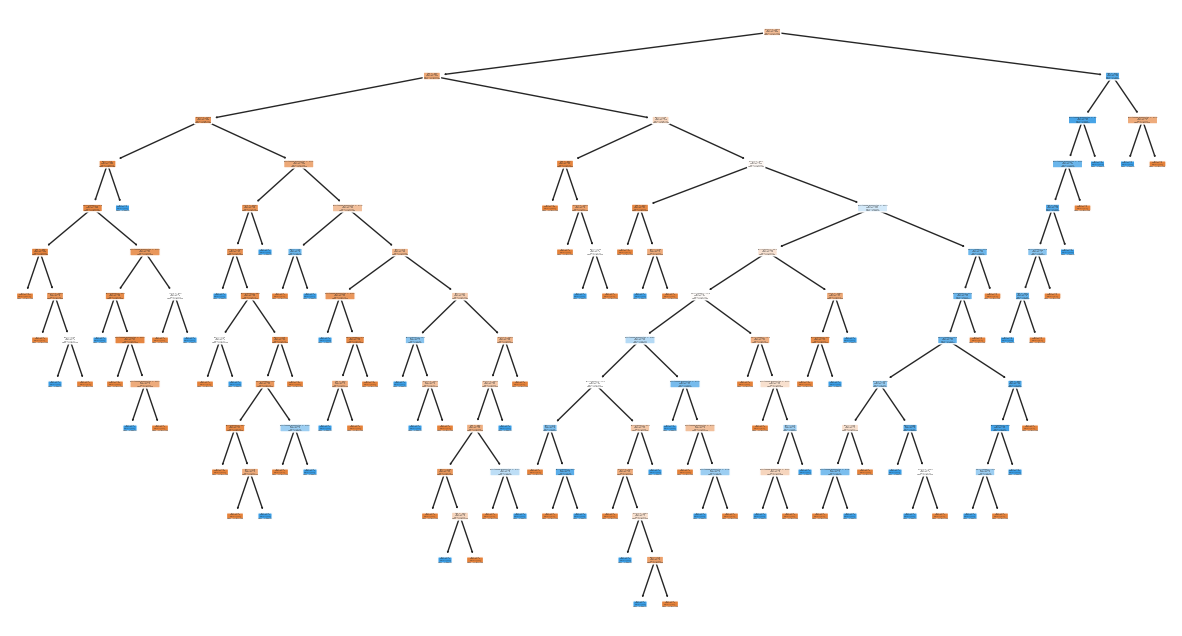

In [53]:
# Visualize the decision tree
plt.figure(figsize=(15, 8))
plot_tree(classifier, feature_names=features, class_names=['No Diabetes', 'Diabetes'], filled=True, rounded=True)
plt.show()


First optimization

Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79        92
           1       0.49      0.58      0.53        36

    accuracy                           0.71       128
   macro avg       0.66      0.67      0.66       128
weighted avg       0.73      0.71      0.72       128



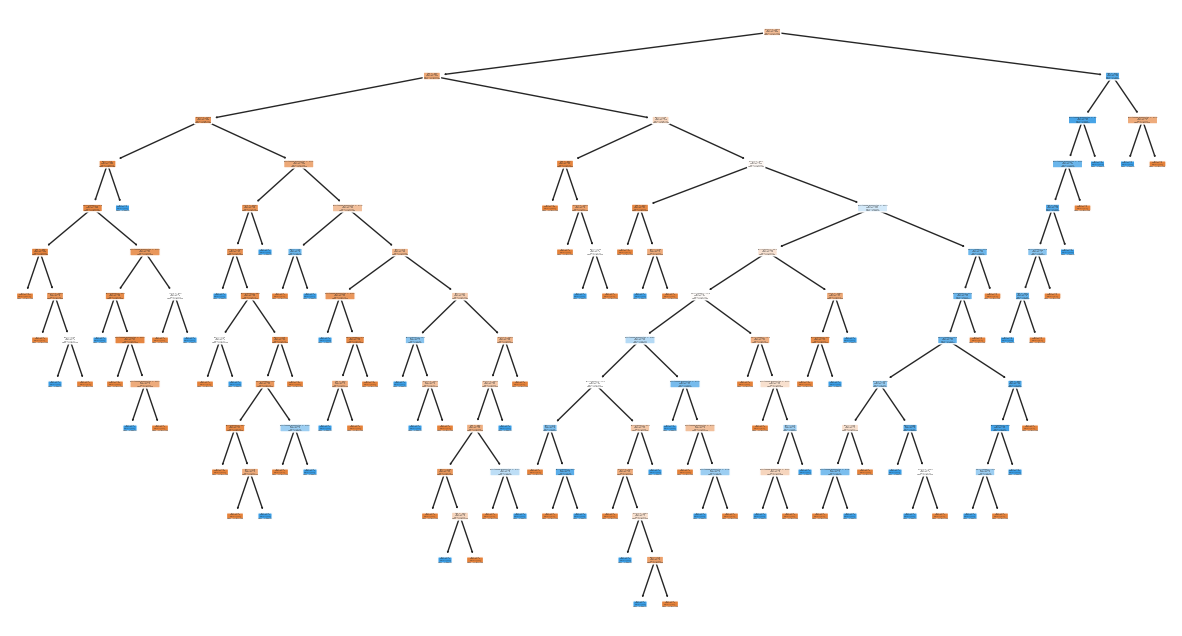

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Assuming total_data is your DataFrame
# If you haven't loaded your data yet, make sure to do so before running this code

# Select features and target variable
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target = 'Outcome'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(total_data[features], total_data[target], test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier with hyperparameters
# You can modify these hyperparameters based on your experimentation
classifier = DecisionTreeClassifier(
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=None,
    criterion='gini'  # You can change this to 'entropy' for information gain
)

# Train the model
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(15, 8))
plot_tree(classifier, feature_names=features, class_names=['No Diabetes', 'Diabetes'], filled=True, rounded=True)
plt.show()


Decision Tree Model:

A decision tree classifier is trained on the data.
Mean Squared Error is 0.328125.
Model achieves 70% accuracy on the test set.
Classification Report Analysis:

Precision, recall, and F1-score are reported for each class.
The model performs reasonably well, achieving 70% accuracy on the test set.

2dn Optimization

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming total_data is your DataFrame
# If you haven't loaded your data yet, make sure to do so before running this code

# Select features and target variable
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target = 'Outcome'

# Split the data into training and testing sets with a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(total_data[features], total_data[target], test_size=0.2, random_state=42)

# Define the decision tree classifier
tree_classifier = DecisionTreeClassifier()

# Define the hyperparameters and values to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(tree_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_tree_classifier = DecisionTreeClassifier(**best_params)
best_tree_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = best_tree_classifier.predict(X_test)

# Evaluate the optimized model
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Model Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Optimized Model Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        92
           1       0.57      0.47      0.52        36

    accuracy                           0.75       128
   macro avg       0.69      0.67      0.67       128
weighted avg       0.74      0.75      0.74       128



3rd optimization

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming total_data is your DataFrame
# If you haven't loaded your data yet, make sure to do so before running this code

# Select features and target variable
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target = 'Outcome'

# Split the data into training and testing sets with a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(total_data[features], total_data[target], test_size=0.2, random_state=42)

# Define the decision tree classifier
tree_classifier = DecisionTreeClassifier()

# Define the hyperparameters and values to search
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(tree_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Train the model with the best hyperparameters
best_tree_classifier = DecisionTreeClassifier(**best_params)
best_tree_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = best_tree_classifier.predict(X_test)

# Evaluate the optimized model
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Model Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Optimized Model Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        92
           1       0.57      0.47      0.52        36

    accuracy                           0.75       128
   macro avg       0.69      0.67      0.67       128
weighted avg       0.74      0.75      0.74       128



In [51]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 636 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   636 non-null    int64  
 1   BloodPressure             636 non-null    int64  
 2   SkinThickness             636 non-null    int64  
 3   Insulin                   636 non-null    int64  
 4   BMI                       636 non-null    float64
 5   DiabetesPedigreeFunction  636 non-null    float64
 6   Age                       636 non-null    int64  
 7   Outcome                   636 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 44.7 KB


In [56]:
# Load the necessary libraries
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming total_data is your DataFrame
# If you haven't loaded your data yet, make sure to do so before running this code

# Select features and target variable
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target = 'Outcome'

# Split the data into training and testing sets with a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(total_data[features], total_data[target], test_size=0.2, random_state=42)

# Use SelectKBest to select the top 3 features
kbest_selector = SelectKBest(k=6)
X_train_selected = kbest_selector.fit_transform(X_train, y_train)
X_test_selected = kbest_selector.transform(X_test)

# Define the decision tree classifier
tree_classifier = DecisionTreeClassifier()

# Define the hyperparameters and values to search
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(tree_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_selected, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Train the model with the best hyperparameters
best_tree_classifier = DecisionTreeClassifier(**best_params)
best_tree_classifier.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = best_tree_classifier.predict(X_test_selected)

# Evaluate the optimized model
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Model Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Optimized Model Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        92
           1       0.57      0.47      0.52        36

    accuracy                           0.75       128
   macro avg       0.69      0.67      0.67       128
weighted avg       0.74      0.75      0.74       128



In [57]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import GridSearchCV

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the model architecture
def create_model(input_shape, learning_rate, optimizer, units, dropout_rate):
    model = keras.models.Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dense(units, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define hyperparameters to tune
param_dist = {
    'learning_rate': [0.001, 0.01, 0.1],
    'optimizer': ['adam', 'sgd'],
    'units': [64, 128, 256],
    'dropout_rate': [0.1, 0.2, 0.3, 0.4, 0.5]
}

# Define a function to evaluate the model
def evaluate_model(input_shape, learning_rate, optimizer, units, dropout_rate):
    model = create_model(input_shape, learning_rate, optimizer, units, dropout_rate)
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
    val_acc = history.history['val_accuracy'][-1]
    return val_acc

# Initialize GridSearchCV with the specified parameters
grid_search = GridSearchCV(estimator=evaluate_model, param_grid=param_dist, cv=5, scoring='accuracy')

# Fit the model and get the best hyperparameters
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

# Create a new model with the best hyperparameters
model = create_model(x_train.shape[1:], best_params['learning_rate'], best_params['optimizer'], best_params['units'], best_params['dropout_rate'])

# Evaluate the final model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

ModuleNotFoundError: No module named 'tensorflow'